In [5]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [6]:
sink_gas_data = pickle.load(open('./pickles/L5_8M_sink_data.pickle','rb'))

In [170]:
def calculate_mass_thresh(sink_rad, dens_thresh):
    vol = (4./3) * np.pi * sink_rad**3
    mass_thresh = dens_thresh * vol
    mass_thresh_solar = mass_thresh * 5.0279e-34
    return mass_thresh_solar

mass_thresh = calculate_mass_thresh(2.636687e17, 6.772331e-20)
print mass_thresh

vol = 65 * (2.636687e17 / 2.5)**3
mass_cells = 6.772331e-20 * vol * 5.0279e-34
print mass_cells/mass_thresh

2.6145030378
0.993126844893


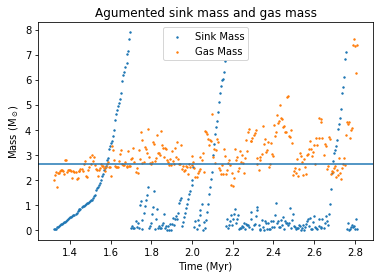

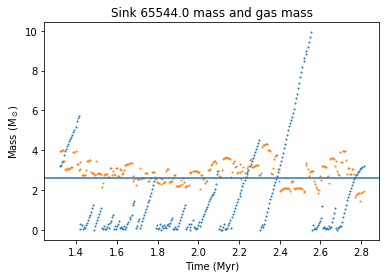

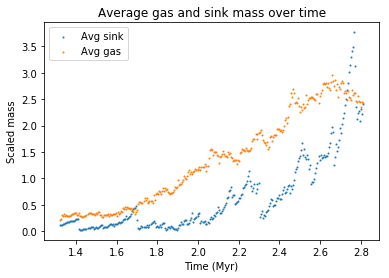

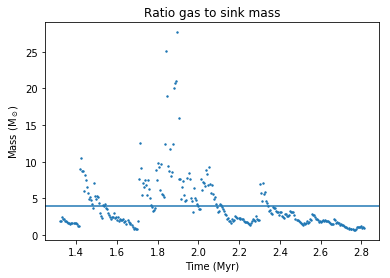

In [166]:
#print sink_gas_data['name']
#print sink_gas_data["sink_mass"].mean()


sink_name = '65544.0'
sink_name = '65541.0'
plt.figure()
sink_array = np.where(sink_gas_data['name'] == sink_name)
#print sink_gas_data[sink_array]["sink_accr"][0]
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_data[sink_array]["sink_mass"][0]*5.0279e-34, 
            label='Sink Mass', 
            s=2)
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_data[sink_array]["gas_mass"][0]*5.0279e-34,
            label='Gas Mass', 
            s=2)
plt.axhline(y=mass_thresh)
plt.title('Agumented sink mass and gas mass')
plt.xlabel('Time (Myr)')
plt.ylabel('Mass (M$_\odot$)')
plt.legend()
plt.show()

#plt.figure()
#plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, sink_gas_data[sink_array]["sink_accr"][0],s=1)
#plt.show()

plt.figure()
sink_name = '65544.0'
sink_array = np.where(sink_gas_data['name'] == sink_name)
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_data[sink_array]["sink_mass"][0]*5.0279e-34,
            s=1)
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14, 
            sink_gas_data[sink_array]["gas_mass"][0]*5.0279e-34,
            s=1)
plt.axhline(y=mass_thresh)
plt.title('Sink 65544.0 mass and gas mass')
plt.xlabel('Time (Myr)')
plt.ylabel('Mass (M$_\odot$)')
plt.legend()
plt.show()

#ratio_gas_sink_mass = sink_gas_data["sink_mass"].mean()

plt.figure()
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14,
            sink_gas_data["sink_mass"].mean()*5.0279e-34,
            label='Avg sink',s=1)
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14,sink_gas_data["gas_mass"].mean()*5.0279e-34,label='Avg gas',s=1)
plt.title('Average gas and sink mass over time')
plt.xlabel('Time (Myr)')
plt.ylabel('Scaled mass')
plt.legend()
plt.show()

ratio_gas_to_sink = sink_gas_data["gas_mass"].mean()/sink_gas_data["sink_mass"].mean()
avg_ratio = ratio_gas_to_sink.mean()
plt.figure()
plt.scatter(sink_gas_data[sink_array]["time"][0]*3.17098e-14,
            ratio_gas_to_sink,
            s=2)
plt.axhline(y=avg_ratio)
plt.title('Ratio gas to sink mass')
plt.xlabel('Time (Myr)')
plt.ylabel('Mass (M$_\odot$)')
plt.legend()
plt.show()

In [108]:
# plot average sink mass and average gas mass over time
mass_sink = 0.0
counter = 1
sink_avg_list = []
for i in np.arange(1,len(sink_gas_data['name'])):
    
    sink_mass_inst = sink_gas_data["sink_mass"][i][0][i]
    print sink_mass_inst
    if sink_mass_inst > 1.0:
        
        mass_sink += sink_mass_inst
        counter += 1
    sink_avg = mass_sink / counter
    sink_avg_list.append(sink_avg)
    mass_sink = 0.0
    counter = 1
    for j in np.arange(0, len(sink_gas_data["sink_mass"][i][0])):
        #mass_sink += sink_gas_data["sink_mass"][i][0][j]
        #sink_avg = mass_sink.mean()
        #print sink_gas_data["sink_mass"][i]
    #sink_avg_list.append(sink_avg)
        
    #if sink_gas_data["particle_mass"][i]
#print sink_gas_data["sink_mass"][1:-1]
#print sink_gas_data["time"]

print sink_avg_list

7.62064465767e+31
6.73053685386e+33
1.05992893692e+32
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[3.8103223288361146e+31, 3.3652684269301169e+33, 5.2996446846030996e+31, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [137]:
#print sink_gas_data["sink_mass"][1][0:1]
#print sink_gas_data["sink_mass"]
#plt.plot(sink_gas_data[sink_array]["time"][0]*3.17098e-14, sink_avg_list)

[ array([  5.75194566e+31,   7.62064466e+31,   9.26111142e+31,
         1.92824911e+32,   2.39326314e+32,   3.04266702e+32,
         3.69861081e+32,   4.26331489e+32,   4.83061460e+32,
         5.35702996e+32,   5.85769209e+32,   6.36444693e+32,
         7.00729113e+32,   8.06970200e+32,   8.73481335e+32,
         9.50763536e+32,   1.00395238e+33,   1.05641153e+33,
         1.10045328e+33,   1.15082498e+33,   1.21559836e+33,
         1.28220974e+33,   1.32278217e+33,   1.47414885e+33,
         1.55713776e+33,   1.63005414e+33,   1.68997247e+33,
         1.78286142e+33,   1.88627989e+33,   1.93215895e+33,
         1.97353323e+33,   2.01553985e+33,   2.09618631e+33,
         2.14501460e+33,   2.21753947e+33,   2.28714207e+33,
         2.35195539e+33,   2.40366794e+33,   2.49033677e+33,
         2.66944117e+33,   2.75928638e+33,   3.14152430e+33,
         3.29539411e+33,   3.43957358e+33,   3.57681335e+33,
         3.69228077e+33,   3.95696947e+33,   4.27046979e+33,
         4.41892871e+3